<a href="https://colab.research.google.com/github/lorenzomazzante/ML01/blob/main/TD8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ML01 : TD8 - Régression Logistique - Partie 2

Réalisé par Cyprien Gilet et Khaled Belahcene

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [10]:
run functions.ipynb

# 1. Régression Logistique Scikit-Learn sur base de données Diabete_UCI

Dans cette section nous souhaitons prendre en main l'algorithme de régression logistique proposé par Scikit-Learn sur la base de données Diabete_UCI. Concernant cette base de données, l'objectif est de diagnostiquer la variable d'intérêt diabète.
Le code ci-dessous permet d'importer la base de données Diabete_UCI.

In [11]:
df = pd.read_csv('diabetes_UCI.csv')
print(df.columns.values)
print('df =', df)
print('df_Info =', df.info())

df = df.reset_index()
df.drop(['index'], axis='columns', inplace=True)

YRdf = pd.DataFrame(df['Outcome'])
YR = np.array(YRdf).ravel()
print('np.unique(YR) =', np.unique(YR))

Xdf = df.copy()
Xdf.drop(['Outcome'], axis='columns', inplace=True)

K = int(np.max(YR))
X = np.array(Xdf)

['Pregnancies' 'Glucose' 'BloodPressure' 'SkinThickness' 'Insulin' 'BMI'
 'DiabetesPedigreeFunction' 'Age' 'Outcome']
df =      Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        

**Question 1.1.** Diviser aléatoirement la base de données en une base d'apprentissage et une base de test :

- La base d'apprentissage contiendra $n=500$ observations (patients).
- La base de test contiendra les observations (patients) restants (soit 268).

In [21]:
# RÉPONSE À LA QUESTION 1.1:
Xtrain,Xtest,Ytrain,Ytest = train_test_split(X,YR, train_size=500, random_state=15, shuffle=True)
nTrain = Xtrain.shape[0]
nTest = Xtest.shape[0]
print('nTrain =', nTrain)
print('nTest =', nTest)

nTrain = 500
nTest = 268


**Question 1.2.** À partir de la base d'apprentissage calibrer la Régression Logistique en appliquant la fonction proposée par Scikit-Learn.

- Quelle est l'accuracy globale sur la base d'apprentissage ?
- Quelle est l'accuracy globale sur la base de test ?


In [13]:
# RÉPONSE À LA QUESTION 1.2:
model= LogisticRegression(random_state=0).fit(Xtrain, Ytrain)

Yhattrain = model.predict(Xtrain)
Yhattest = model.predict(Xtest)

print('accuracy globale sur la base d apprentissage:', compute_accuracy(Ytrain, Yhattrain));
print('accuracy globale sur la base de test:', compute_accuracy(Ytest, Yhattest));


accuracy globale sur la base d apprentissage: 0.776
accuracy globale sur la base de test: 0.7574626865671642


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


**Question 1.3.** Comparer ces résultats avec ceux obtenus par le classifieur LDA (cf TD 4).

In [14]:
# RÉPONSE À LA QUESTION 1.3:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
lda.fit(Xtrain, Ytrain)

Yhattrain = lda.predict(Xtrain)
Yhattest = lda.predict(Xtest)

print('accuracy globale sur la base d apprentissage:', compute_accuracy(Ytrain, Yhattrain));
print('accuracy globale sur la base de test:', compute_accuracy(Ytest, Yhattest));

accuracy globale sur la base d apprentissage: 0.776
accuracy globale sur la base de test: 0.7574626865671642


**Question 1.4.** Interprétation du modèle de Régression Logistique :

- Quel est le score de probabilité estimé par la Régression Logistique que le deuxième patient de la base de test soit diabétique ?
- Quel est le score de probabilité estimé par la Régression Logistique que le cinquième patient de la base de test soit diabétique ?
- Calculer le Odds-Ratio d'être diabétique pour un patient de 65 ans avec une pression sanguine de 70 par rapport à un patient de 33 ans avec une pression sanguine de 40.

In [15]:
# RÉPONSE À LA QUESTION 1.4:
d=Xtrain.shape[1]
print('d =', d)
YPredLR_proba = model.predict_proba(Xtest)
print('score de probabilité estimé que le deuxième patient soit diabétique:', YPredLR_proba[1,1]);
print('score de probabilité estimé que le cinquième patient soit diabétique:', YPredLR_proba[4,1]);

#odds ratio
beta = np.zeros(d+1)
beta[0] = model.intercept_[0]
beta[1:] = model.coef_
print('beta =', beta)

OddsRatio = (np.exp(70*beta[8])*np.exp(65*beta[3]))/(np.exp(40*beta[8])*np.exp(33*beta[3]))
print('OddsRatio:', OddsRatio);

d = 8
score de probabilité estimé que le deuxième patient soit diabétique: 0.43191940995209843
score de probabilité estimé que le cinquième patient soit diabétique: 0.17805088122315377
beta = [-8.69681467e+00  1.10157975e-01  3.85901068e-02 -1.65052091e-02
  1.28269314e-04 -1.67922718e-03  9.03360183e-02  1.03781694e+00
  2.24836825e-02]
OddsRatio: 1.1575940826633264


 # 2. Régularisation LASSO sur base de données Diabete_UCI

Dans cette section nous souhaitons sélectionner un petit nombre de variables permettant d'expliquer la variable d'intérêt diabète.
Le code ci-dessous permet d'importer la base de données Diabete_UCI.

**Question 2.1.** À partir de l'aide proposée par Scikit-Learn, implémenter un algorithme permettant de sélectionner les 3 varaibles les plus linéairement pertinentes à partir d'une régularisation LASSO pour expliquer la variable Diabète.
- Afficher en parallèle sur deux figures l'évolution des poids $\beta$ ainsi que de l'accuracy globale en fonction de l'hyperparamètre de régularisation $\lambda$.
- Quel hyperparamètre de régularisation $\lambda$ choisireriez-vous pour sélectionner les 4 variables les plus pertinentes ?
- Quelles seraient ainsi les 4 variables les plus pertinentes ?

In [23]:
# RÉPONSE À LA QUESTION 2.1:
np.random.seed(407)

step = 0.005
stock_lambda = np.arange(0.0001, 1, step)
nb_lambda = stock_lambda.shape[0]
stock_beta = np.zeros((nb_lambda,d))
stock_average_risk_Train = np.zeros(nb_lambda)

l = 0

for lmbda in stock_lambda:
    LR_model = LogisticRegression(penalty='l1', solver='saga', C=lmbda, max_iter = 10000)
    LR_model.fit(Xtrain, Ytrain)
    Yhat = LR_model.predict(Xtrain)
    stock_average_risk_Train[l] = np.sum(Ytrain==Yhat)/nTrain
    stock_beta[l] = LR_model.coef_

    l = l+1

<>:8: SyntaxWarning: invalid escape sequence '\l'
<>:10: SyntaxWarning: invalid escape sequence '\l'
<>:20: SyntaxWarning: invalid escape sequence '\l'
<>:22: SyntaxWarning: invalid escape sequence '\l'
<>:8: SyntaxWarning: invalid escape sequence '\l'
<>:10: SyntaxWarning: invalid escape sequence '\l'
<>:20: SyntaxWarning: invalid escape sequence '\l'
<>:22: SyntaxWarning: invalid escape sequence '\l'
/tmp/ipython-input-448572218.py:8: SyntaxWarning: invalid escape sequence '\l'
  ax1.set_xlabel("Régularisation $ c = 1/ \lambda$",fontsize=20)
/tmp/ipython-input-448572218.py:10: SyntaxWarning: invalid escape sequence '\l'
  ax1.set_title("Beta versus $\lambda$",fontsize=20)
/tmp/ipython-input-448572218.py:20: SyntaxWarning: invalid escape sequence '\l'
  ax2.set_xlabel("Régularisation $c = 1/ \lambda$",fontsize=20)
/tmp/ipython-input-448572218.py:22: SyntaxWarning: invalid escape sequence '\l'
  ax2.set_title("Accuracy versus $\lambda$",fontsize=20)


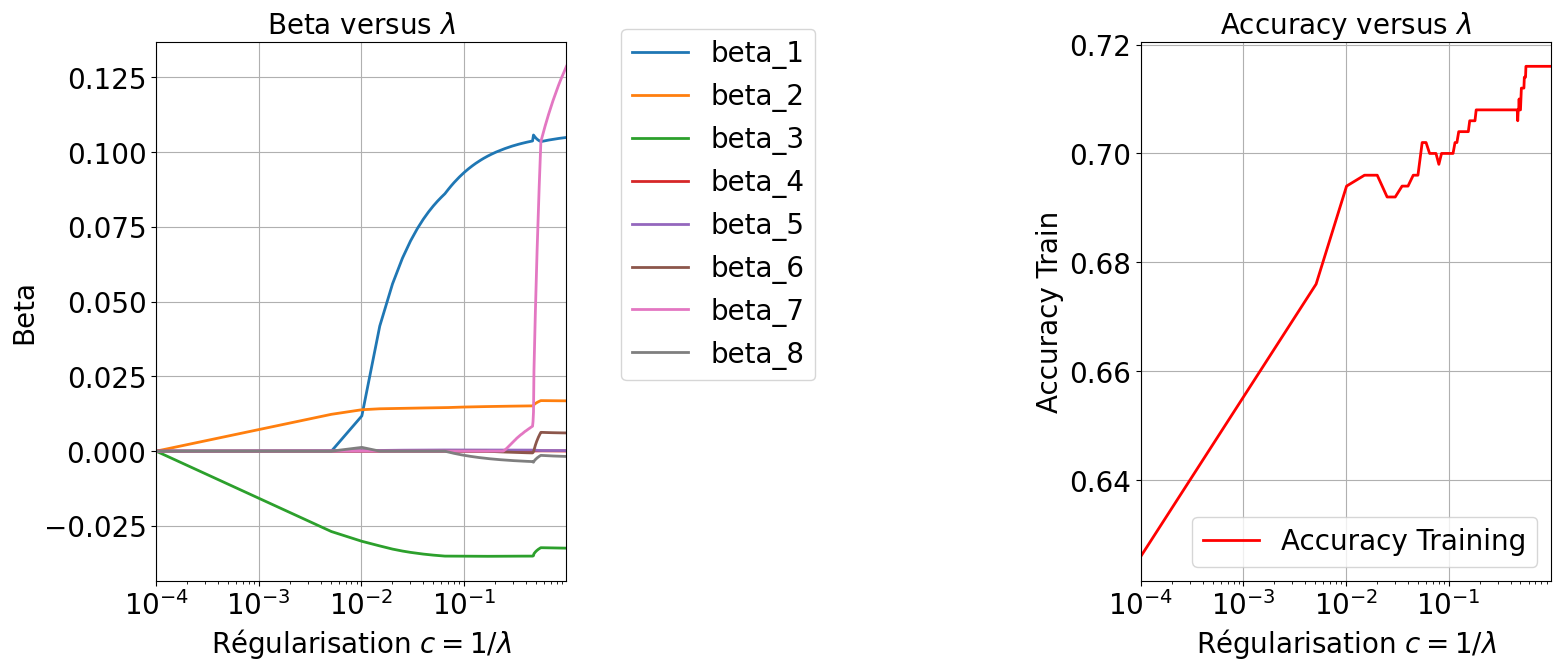

In [24]:
fig_select_lambda = plt.figure(figsize=(18,7))

ax1 = fig_select_lambda.add_subplot(1,3,1)
for j in range(d):
    labelstring = "beta_"+str(j+1)
    ax1.plot(stock_lambda, stock_beta[:,j], lw=2, label=labelstring)
ax1.legend(fontsize=20, bbox_to_anchor=(1.1, 1.05))
ax1.set_xlabel("Régularisation $ c = 1/ \lambda$",fontsize=20)
ax1.set_ylabel("Beta",fontsize=20)
ax1.set_title("Beta versus $\lambda$",fontsize=20)
ax1.tick_params(axis='x', labelsize=20)
ax1.tick_params(axis='y', labelsize=20)
ax1.set_xlim([np.min(stock_lambda),np.max(stock_lambda)])
ax1.grid()
ax1.set_xscale('log')

ax2 = fig_select_lambda.add_subplot(1,3,3)
ax2.plot(stock_lambda, stock_average_risk_Train, lw=2, color='red', label='Accuracy Training')
ax2.legend(fontsize=20, loc='lower right')
ax2.set_xlabel("Régularisation $c = 1/ \lambda$",fontsize=20)
ax2.set_ylabel("Accuracy Train",fontsize=20)
ax2.set_title("Accuracy versus $\lambda$",fontsize=20)
ax2.tick_params(axis='x', labelsize=20)
ax2.tick_params(axis='y', labelsize=20)
ax2.set_xlim([np.min(stock_lambda),np.max(stock_lambda)])
ax2.grid()
ax2.set_xscale('log')

fig_select_lambda.savefig('fig_select_lambda.pdf')

# 3. Extension au contexte multi-class sur base de données Abalone :

Dans cette section nous souhaitons appliquer la régression logistique lorsque le nombre de classe est supérieur à 2 ($K\geq 2$).
Pour ce faire nous allons considérer la base de données Abalone.
Plus de détails concernant cette base de données sont disponibles ici : https://www.kaggle.com/datasets/rodolfomendes/abalone-dataset

- L'objectif pour cette base de données connue est de prédire l'âge d'un coquillage (Abalone) en fonction de 8 variables descriptives.
- Nous considérons 5 classes à prédire (5 tranches d'âges différentes) {A1, A2, A3, A4, A5} vérifiant les âges suivants
{$[\leq 4], [5, 10], [11, 15], [16, 20], [\geq 21]$}.
- À noter que la première variable descriptive (caractérisant le sexe) est catégorielle à 3 valeurs possibles :
    - 1 si M
    - 2 si F
    - 3 si I (Nourrisson)
    
Le code ci-dessous permet d'importer la base de données Abalone.

In [26]:
### Load data
from scipy.io import loadmat
data = loadmat('Datasets/abalone_data.mat')
data.keys()

K = int(data['K'][0][0])
Xdf = pd.DataFrame(data['X'])
YRdf = pd.DataFrame(data['YR'], columns = ['Labels'])
YR = np.array(YRdf).ravel()

FileNotFoundError: [Errno 2] No such file or directory: 'Datasets/abalone_data.mat'

In [ ]:
Xdf

,0,1,2,3,4,5,6,7
0,3.0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500
1,3.0,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700
2,1.0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100
3,3.0,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550
4,2.0,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550
...,...,...,...,...,...,...,...,...
4172,1.0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490
4173,3.0,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605
4174,3.0,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080
4175,1.0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960


**Question 3.1.** Comment encoder la variable catégorielle ? Appliquer cet encodage ci-dessous :

In [25]:
# RÉPONSE À LA QUESTION 3.1:

Xdframe = Xdf.copy()
vCat = np.array(Xdf)[:,0].astype(int)
one_hot_encode = pd.get_dummies(vCat, dtype=int)
Xdframe.drop(Xdframe.columns[0], inplace=True, axis=1)


Xdframe.insert(loc=0, column='M', value=np.array(one_hot_encode)[:,0])
Xdframe.insert(loc=1, column='F', value=np.array(one_hot_encode)[:,1])
Xdframe.insert(loc=2, column='I', value=np.array(one_hot_encode)[:,2])
print(Xdframe)
X = np.array(Xdframe)
print(X)


     M  F  I  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0    0  0  0      148             72             35        0  33.6   
1    0  1  0       85             66             29        0  26.6   
2    0  0  0      183             64              0        0  23.3   
3    0  1  0       89             66             23       94  28.1   
4    1  0  0      137             40             35      168  43.1   
..  .. .. ..      ...            ...            ...      ...   ...   
763  0  0  0      101             76             48      180  32.9   
764  0  0  1      122             70             27        0  36.8   
765  0  0  0      121             72             23      112  26.2   
766  0  1  0      126             60              0        0  30.1   
767  0  1  0       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  
2                       0.672   32  
3          

**Question 3.2.** Diviser aléatoirement la base de données en une base d'apprentissage et une base de test :

- La base d'apprentissage contiendra $n=3000$ observations (patients).
- La base de test contiendra les observations (patients) restants (soit 1177).

In [ ]:
# RÉPONSE À LA QUESTION 3.2 :
from sklearn.model_selection import train_test_split

np.random.seed(407)

XTrain, XTest, YRTrain, YRTest = train_test_split(X, YR, train_size=3000, random_state=407)


d = XTrain.shape[1]
nTrain = XTrain.shape[0]
print('nTrain =', nTrain)
nTest = XTest.shape[0]
print('nTest =', nTest)


**Question 3.3.** À partir de la base d'apprentissage calibrer la Régression Logistique multinomiale en appliquant les fonctions proposées par Scikit-Learn.

- Calculer les l'accuracy globales et par classe sur la base d'apprentissage ?
- Calculer les l'accuracy globales et par classe sur la base de Test ?


In [ ]:
run functions.ipynb

In [ ]:
# RÉPONSE À LA QUESTION 3.3 :
from sklearn.linear_model import LogisticRegression


# Fit Logistic Regression :
LR_model = LogisticRegression(max_iter = 10000)
LR_model.fit(XTrain, YRTrain)

# Accuracy Train LR :
YhatTrain = LR_model.predict(XTrain)
Acc_LR_TRain = compute_accuracy(YRTrain, YhatTrain)
print('Accuracy Train LR =', Acc_LR_TRain)
Acc_LR_Class_TRain = compute_accuracy_per_class(YRTrain, YhatTrain, K)
print('Accuracy Class Train LR =', Acc_LR_Class_TRain)

print('')

#Accuracy Test LR :
YhatTest = LR_model.predict(XTest)
Acc_LR_Test = compute_accuracy(YRTest, YhatTest)
print('Accuracy Test LR =', Acc_LR_Test)
Acc_LR_Class_Test = compute_accuracy_per_class(YRTest, YhatTest, K)
print('Accuracy Class Test LR =', Acc_LR_Class_Test)

**Question 3.4.** Interprétation du modèle de Régression Logistique :

- Quel est le score de probabilité estimé par la Régression Logistique que le deuxième Abalone de la base de test ait entre 11 et 15 ans ?


In [ ]:
# RÉPONSE À LA QUESTION 3.4:

# Probabilités deuxième coquillahe Test :
probaTest = LR_model.predict_proba(XTest)
print('Probabilités deuxième coquillage Test =', probaTest[1,:])
print('Probabilité deuxième coquillage Test en âge [11,15] ans=', probaTest[1,2])

In [ ]:
LR_model.coef_

**Question 3.1.** Dans ce nouveau contexte nous allons utiliser la fonction de perte quadratique pour évaluer la performance de la régression logistique.

- Pourquoi la fonction de perte quadratique semble pertinente ici ?
- Implémenter ci-dessous le code pour obtenir la fonction de perte quadratique.
- Calculer le risque d'erreur moyen sur la base d'apprentissage et la base de test en considérant cette fonction de perte quadratique.

In [ ]:
# RÉPONSE À LA QUESTION 3.1:

L = np.zeros((K,K))
for k in range(0,K):
    for l in range(0,K):
        L[k,l] = (l-k)*(l-k)

print('Lquad :')
print(L)

print('')
# Risk Train LR :
Risk_LR_TRain = compute_average_risk(YRTrain, YhatTrain, K, L)
print('Risk Train LR =', Risk_LR_TRain)


print('')

#Risk Test LR :
Risk_LR_Test = compute_average_risk(YRTest, YhatTest, K, L)
print('Risk Test LR =', Risk_LR_Test)
